In [ ]:
# 한글폰트 적용하기

!apt -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# matplotlib 한글폰트 적용
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# 필수 라이브러리 임포트

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle
data1 = pd.read_csv('한국남동발전2019.csv', encoding='utf-8')  # 20190101~20191231
data2 = pd.read_csv('한국남동발전2020.csv', encoding='utf-8')  # 20200101~20201116
data1_2=pd.concat([data1,data2],axis=0)
data00 = pd.read_csv('경남진주기후정보.csv', encoding='utf-8').iloc[:,2:] # 20190101~20201116
data00.fillna(0, inplace=True)

In [ ]:
data00.info()
data00.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             686 non-null    object 
 1   평균기온(°C)       686 non-null    float64
 2   일강수량(mm)       686 non-null    float64
 3   평균 풍속(m/s)     686 non-null    float64
 4   평균 상대습도(%)     686 non-null    float64
 5   합계 일조시간(hr)    686 non-null    float64
 6   합계 일사량(MJ/m2)  686 non-null    float64
dtypes: float64(6), object(1)
memory usage: 37.6+ KB


(686, 7)

In [ ]:
data1_2.info()
data1_2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 320
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월일     686 non-null    object
 1   호기      686 non-null    int64 
 2   구분      686 non-null    object
 3   1       686 non-null    int64 
 4   2       686 non-null    int64 
 5   3       686 non-null    int64 
 6   4       686 non-null    int64 
 7   5       686 non-null    int64 
 8   6       686 non-null    int64 
 9   7       686 non-null    int64 
 10  8       686 non-null    int64 
 11  9       686 non-null    int64 
 12  10      686 non-null    int64 
 13  11      686 non-null    int64 
 14  12      686 non-null    int64 
 15  13      686 non-null    int64 
 16  14      686 non-null    int64 
 17  15      686 non-null    int64 
 18  16      686 non-null    int64 
 19  17      686 non-null    int64 
 20  18      686 non-null    int64 
 21  19      686 non-null    int64 
 22  20      686 non-null    in

(686, 28)

In [ ]:
data1_2

,년월일,호기,구분,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,일간발전량
0,2019-01-01,1,발전량,0,0,0,0,0,0,5,22,57,117,159,0,211,226,126,92,20,4,0,0,0,0,0,0,1039
1,2019-01-02,1,발전량,0,0,0,0,0,0,4,22,58,122,176,229,235,176,120,31,4,0,0,0,0,0,0,0,1177
2,2019-01-03,1,발전량,0,0,0,0,0,0,2,20,62,122,172,230,229,169,114,30,5,0,0,0,0,0,0,0,1155
3,2019-01-04,1,발전량,0,0,0,0,0,0,2,20,56,96,116,51,76,70,35,17,3,0,0,0,0,0,0,0,542
4,2019-01-05,1,발전량,0,0,0,0,0,0,2,22,46,93,131,98,180,149,94,31,5,0,0,0,0,0,0,0,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2020-11-12,1,발전량,0,0,0,0,0,0,10,23,49,55,113,75,35,36,36,13,2,0,0,0,0,0,0,0,447
317,2020-11-13,1,발전량,0,0,0,0,0,1,13,50,98,160,217,253,216,132,63,18,3,0,0,0,0,0,0,0,1224
318,2020-11-14,1,발전량,0,0,0,0,0,0,14,49,90,147,191,223,189,120,56,19,2,0,0,0,0,0,0,0,1100
319,2020-11-15,1,발전량,0,0,0,0,0,1,14,42,77,115,178,207,180,114,57,22,3,0,0,0,0,0,0,0,1010


In [ ]:
data1_2.reset_index(drop=True,inplace=True)
data=pd.concat([data00,data1_2['일간발전량']],axis=1)

In [ ]:
data.to_csv('data.csv', encoding='utf_8_sig')
data


,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),일간발전량
0,2019-01-01,-1.3,0.0,0.9,50.4,7.7,10.83,1039
1,2019-01-02,-0.6,0.0,1.0,48.8,8.5,11.76,1177
2,2019-01-03,-1.8,0.0,0.4,50.0,8.5,12.46,1155
3,2019-01-04,-0.4,0.0,0.3,45.8,3.3,6.19,542
4,2019-01-05,2.3,0.0,0.8,48.0,7.4,10.56,851
...,...,...,...,...,...,...,...,...
681,2020-11-12,7.5,0.0,0.5,72.5,9.2,13.81,447
682,2020-11-13,8.4,0.0,0.4,74.4,9.2,12.80,1224
683,2020-11-14,9.8,0.0,0.4,82.3,8.1,10.66,1100
684,2020-11-15,10.3,0.0,0.4,79.6,9.0,12.90,1010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


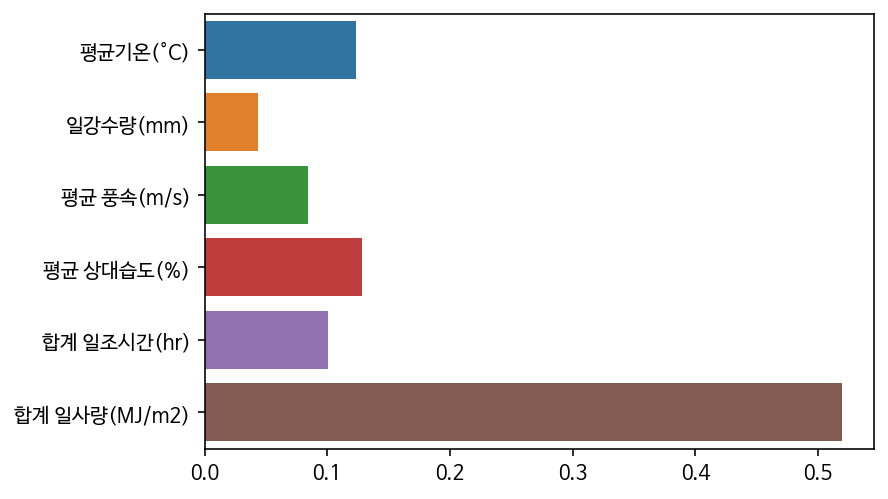

In [ ]:
#특성중요도 파악
# 랜덤포레스트 회귀모델 + MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# X(발생에 영향을 주는 인자)와 y(쓰레기 발생량)구분
X = data.iloc[:, 1:-1]
y = data.iloc[:,-1:]

# 정규화
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y)

# 모델 학습 / 평가
model_R = RandomForestRegressor(n_estimators=1000, random_state=0)


model_R.fit(X_norm,y_norm)

# 특성 중요도 시각화

sns.barplot(x=model_R.feature_importances_, y=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

교차검증 정확도 : 0.2863067538924782


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


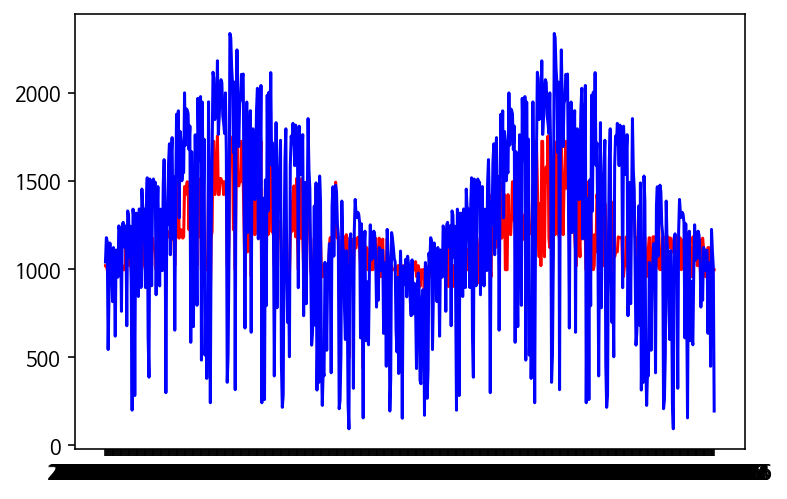

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

# 모델생성
X = data.iloc[:, 1:-1]

y = data.iloc[:,-1:]
model_A = AdaBoostRegressor(n_estimators=100)

# 모델 임의분할교차검증 진행
ss = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=0)
score = cross_val_score(model_A, X,  y, cv=ss)
print('교차검증 정확도 :',score.mean())

model_A.fit(X,y)
y_pred = model_A.predict(X)
year = data['일시']
plt.plot(year, y_pred, 'r',label='예측')
plt.plot(year, y, 'b',label='실제')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

교차검증 정확도 : 0.4039617616599978


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


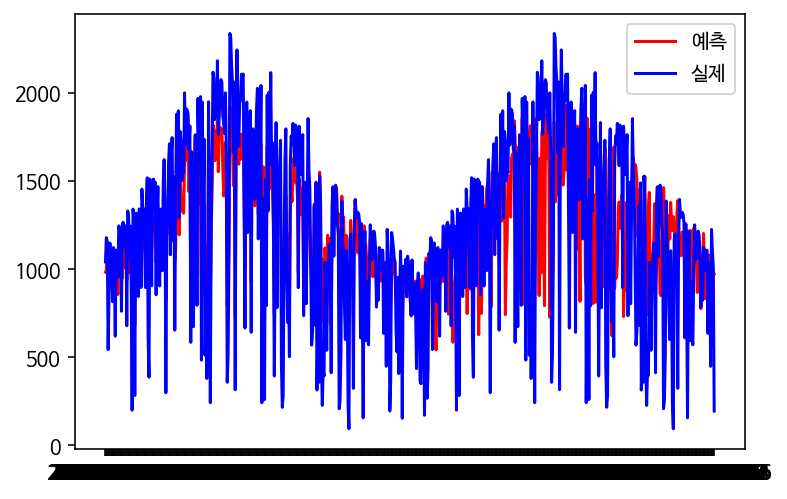

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import BaggingRegressor

X = data.iloc[:, 1:-1]

y = data.iloc[:,-1:]
model_L = BaggingRegressor(base_estimator=LinearRegression(normalize=True) ,
                          n_estimators=1000, 
                          random_state=10)

# X 변수의 MinMaxScaler 전처리.
my_scaler = MinMaxScaler()
X = my_scaler.fit_transform(X)
# 모델 교차검증 진행
ss = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=0)
score = cross_val_score(model_L, X,  y, cv=ss)
print('교차검증 정확도 :',score.mean())

model_L.fit(X,y)
y_pred = model_L.predict(X)
year = data['일시']
plt.plot(year, y_pred, 'r',label='예측')
plt.plot(year, y, 'b',label='실제')

plt.legend()


In [ ]:
# 훈련,테스트 데이터 분리
train_ratio = 0.8
test_begin_index = int(data.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

shuffle_map = np.arange(data.shape[0])
shuffle_map
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

train_data = data.loc[shuffle_map[:test_begin_index]]
test_data  = data.loc[shuffle_map[test_begin_index : ]]
train_data.reset_index(inplace = True, drop=True)
test_data.reset_index(inplace = True, drop=True)
print("=========================================")
print(data[:5])
print("=========================================")
print(train_data[:10])

test_begin_index :  548
[106  60 538 488 525]
           일시  평균기온(°C)  일강수량(mm)  ...  합계 일조시간(hr)  합계 일사량(MJ/m2)  일간발전량
0  2019-01-01      -1.3       0.0  ...          7.7          10.83   1039
1  2019-01-02      -0.6       0.0  ...          8.5          11.76   1177
2  2019-01-03      -1.8       0.0  ...          8.5          12.46   1155
3  2019-01-04      -0.4       0.0  ...          3.3           6.19    542
4  2019-01-05       2.3       0.0  ...          7.4          10.56    851

[5 rows x 8 columns]
           일시  평균기온(°C)  일강수량(mm)  ...  합계 일조시간(hr)  합계 일사량(MJ/m2)  일간발전량
0  2019-04-17      15.2       0.0  ...          8.2          18.62   1614
1  2019-03-02       7.6       0.0  ...          8.8          13.46   1121
2  2020-06-22      22.9       0.0  ...         11.7          29.15   1931
3  2020-05-03      16.8      29.5  ...          0.0           4.02   1847
4  2020-06-09      24.2       0.0  ...         13.1          29.42   1206
5  2020-08-08      25.3     107.5  ...      

In [ ]:
train_X, train_Y = train_data.iloc[:,1:-1], train_data.iloc[:,-1:]
test_X, test_Y   = test_data.iloc[:,1:-1], test_data.iloc[:,-1:]
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(548, 6)
(548, 1)
(138, 6)
(138, 1)


In [ ]:
# X 변수의 MinMaxScaler 전처리.
my_scaler = MinMaxScaler()
train_X = my_scaler.fit_transform(train_X)
test_X = my_scaler.fit_transform(test_X)
# train_Y = my_scaler.fit_transform(train_Y)
# test_Y = my_scaler.fit_transform(train_Y)

In [ ]:
# 모델 만들기
model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 20,
                                                             activation = 'elu',
                                                             input_shape = (6,)),
                                       tf.keras.layers.Dense(units = 25,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 36,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 23,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 10,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units=1)
])


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss = 'mse')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_31 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_32 (Dense)             (None, 36)                936       
_________________________________________________________________
dense_33 (Dense)             (None, 23)                851       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 2,703
Trainable params: 2,703
Non-trainable params: 0
____________________________________________________

In [ ]:
# 학습하기
history = model.fit(train_X, train_Y,
                                epochs = 1000,
                                batch_size = 32,
                                validation_split = 0.2,
                                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 20,
                                                                              monitor = 'val_loss')]
                    )


Epoch 1/1000
14/14 [==============================] - 1s 14ms/step - loss: 1747737.1250 - val_loss: 1854083.5000
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 1743156.2500 - val_loss: 1848182.3750
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 1735699.0000 - val_loss: 1837707.3750
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 1722284.8750 - val_loss: 1817889.6250
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 1695661.5000 - val_loss: 1777884.1250
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 1641451.7500 - val_loss: 1697591.3750
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 1537368.5000 - val_loss: 1547045.5000
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 1349913.1250 - val_loss: 1290690.6250
Epoch 9/1000
14/14 [==============================] - 0s 5ms/step - loss: 1055164.2500 - val_loss: 9109

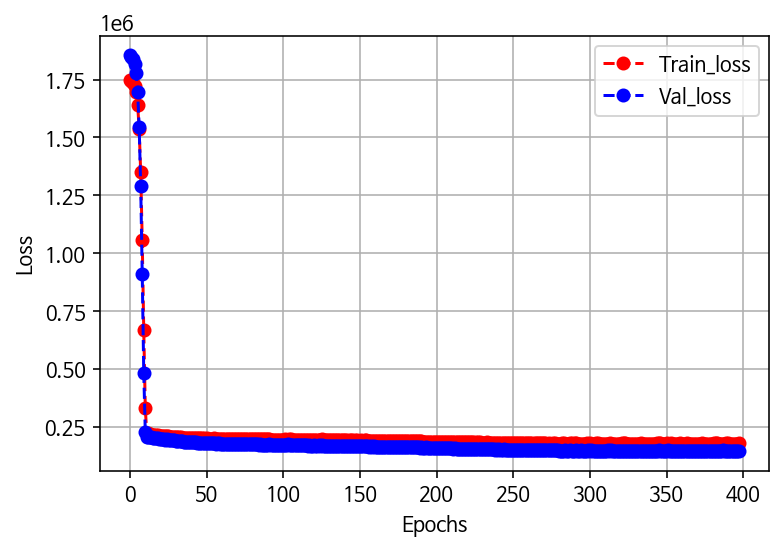

In [ ]:
# 평가하기
plt.plot(history.history['loss'], '--o', color = 'red', label = "Train_loss")
plt.plot(history.history['val_loss'], '--o', color = 'blue', label = "Val_loss")


plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()

plt.show()




In [ ]:
pred_Y = (model.predict(test_X))
pred_Y[:10]

array([[1169.9935 ],
       [1166.2443 ],
       [1104.7782 ],
       [ 914.2688 ],
       [ 989.063  ],
       [1458.8661 ],
       [ 922.9994 ],
       [ 796.79486],
       [1168.2872 ],
       [ 805.6577 ]], dtype=float32)

In [ ]:
test_Y[:10]

,일간발전량
0,1510
1,1143
2,1781
3,873
4,567
5,1505
6,734
7,434
8,1285
9,652


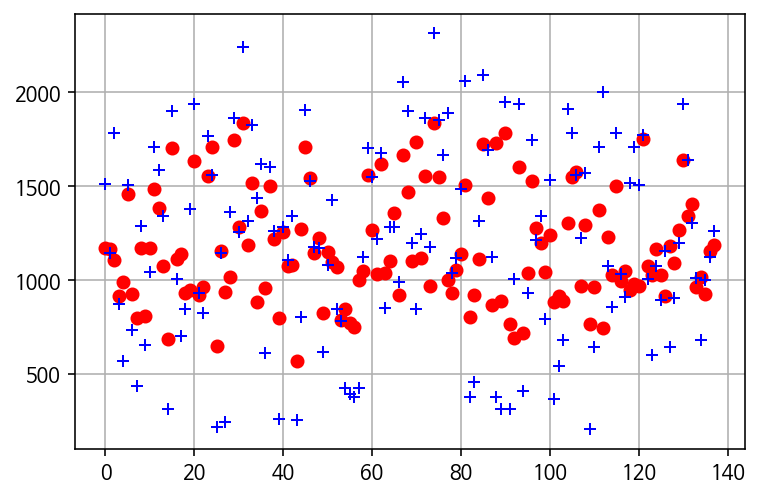

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label = "Pred_Y")
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.grid()
plt.show()

In [ ]:

acc = 1-np.mean(np.abs(np.round(pred_Y) - test_Y)/test_Y)
result = np.round(acc * 100,3)[0]
print("딥러닝 정확도 : ",  result)

딥러닝 정확도 :  62.153


In [ ]:
result


62.153

In [ ]:
# my_scaler 객체 저장.
with open("my_scaler.pkl","wb") as f:
    pickle.dump(my_scaler, f)

In [ ]:
# my_regressor 객체 저장.

with open("my_regressor.pkl","wb") as f:
    pickle.dump(model_L, f)

In [ ]:
# 딥러닝 model 객체 저장.

from keras.models import load_model

model.save('mnist_mlp_model.h5')